January: Part 4 - This notebook is a continuation of gyre_runs_mackenzie02.ipynb. The configuration used to produce these results is still gyre_mackenzie02.

Since Part 3:
* This is a strict continuation of part 3.
* The purpose is to make further improvements on runs that use the final open boundary method of Runs 15, 16, and 18.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

from salishsea_tools import nc_tools

In [2]:
def plot_gyre_times(gridT, var, depth_ind, time_inds, cmax, cmaps, max_min, supttl):
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(time_inds), figsize=(20, 4.5), sharex=True, sharey=True)
    for i, n in zip(time_inds, np.arange(len(time_inds))):
        if max_min == True:
            cmin = -cmax
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        elif max_min == 'tem' or max_min == 'sal':
            cmin = var[:,depth_ind,:,:].min()
            cmax = var[:,depth_ind,:,:].max()
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,i).format('MMM DD HH:mm')
        ax[n].set_title(timestamp, fontsize=16)
        ax[n].set_xlim(0,var.shape[3])
        ax[n].set_ylim(0,var.shape[2])
        ax[n].xaxis.set_visible(False); ax[n].yaxis.set_visible(False)
    title = supttl
    fig.tight_layout(); fig.subplots_adjust(top=0.85); fig.suptitle(title, fontsize=20)
    return fig, ax

In [3]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run15'
gridT_I15, lon_I15, lat_I15, tem_I15, sal_I15, ssh_I15, U_I15, V_I15, W_I15 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run16'
gridT_I16, lon_I16, lat_I16, tem_I16, sal_I16, ssh_I16, U_I16, V_I16, W_I16 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run17'
gridT_I17, lon_I17, lat_I17, tem_I17, sal_I17, ssh_I17, U_I17, V_I17, W_I17 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run19'

1. mackenzie_canyon/bathymetry/initial_sets/idealized/**ideal_bathy_03.nc**
2. mackenzie_canyon/bathymetry/initial_sets/realistic/**real_bathy_01.nc**
3. mackenzie_canyon/bathymetry/initial_sets/coordinates/**coords_01.nc**
4. mackenzie_canyon/conditions/stratification_files/**temp_strat.nc** & **temp_strat_real.nc**
5. mackenzie_canyon/conditions/stratification_files/**salt_strat.nc** & **temp_strat_real.nc**


|Parameter      |Run15    |Run16    |Run17|Run18    |Run19|
|---------------|---------|---------|-----|---------|-----|
|bathy          |ideal    |ideal    |real |ideal    |real |
|ln_bt_nn_auto  |False    |         |     |         |     |    
|rn_bt_cmax     |NA       |         |     |         |     |
|rn_rdt         |20       |         |     |10       |     |
|nn_baro        |4        |         |     |         |     |
|nn_itend       |21600(5d)|         |     |43200(5d)|     |
|nn_write       |1080(6h) |         |     |2160(6h) |     |
|nn_tau000 [ts] |4320(1d) |         |     |8640(1d) |     |
|rn_utau0 [N/m2]|-5.0     |-0.1     |     |         |     |
|rn_vtau0 [N/m2]|0        |         |     |         |     |
|jperio         |cyclic   |         |     |         |     |
|rn_shlat       |0.5      |         |     |         |     |
|rn_aeiv_0      |50       |         |     |         |     |
|rn_ahm_0_lap   |50       |         |     |         |     |
|nb_bdy         |1        |         |     |         |     |
|cn_dyn2d       |flather  |         |     |         |     |
|cn_dyn3d       |orlanski |         |     |         |     |
|cn_tra         |neumann  |         |     |         |     |
|nbdyind        |-1       |         |     |         |     |
|status         |✓        |✓        |✓    |         |     |


# Run15: High Wind Stress (-5.0 Pa)

111.224


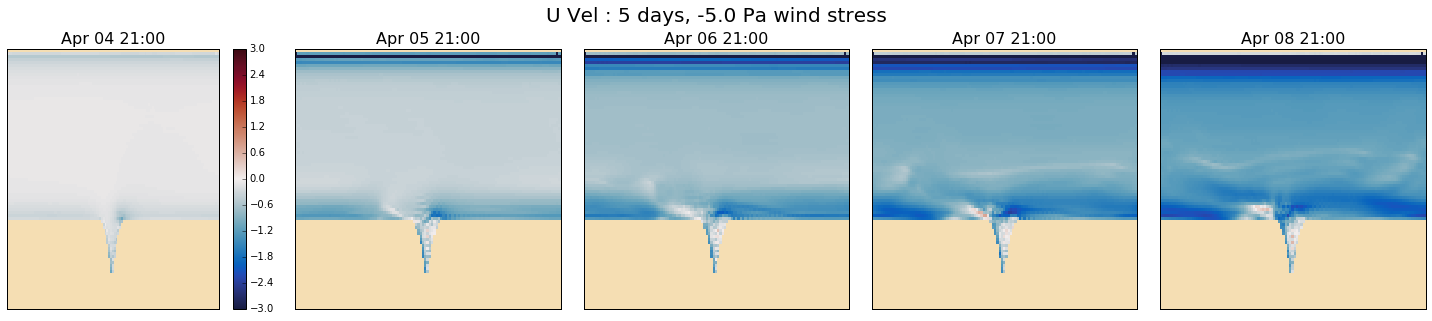

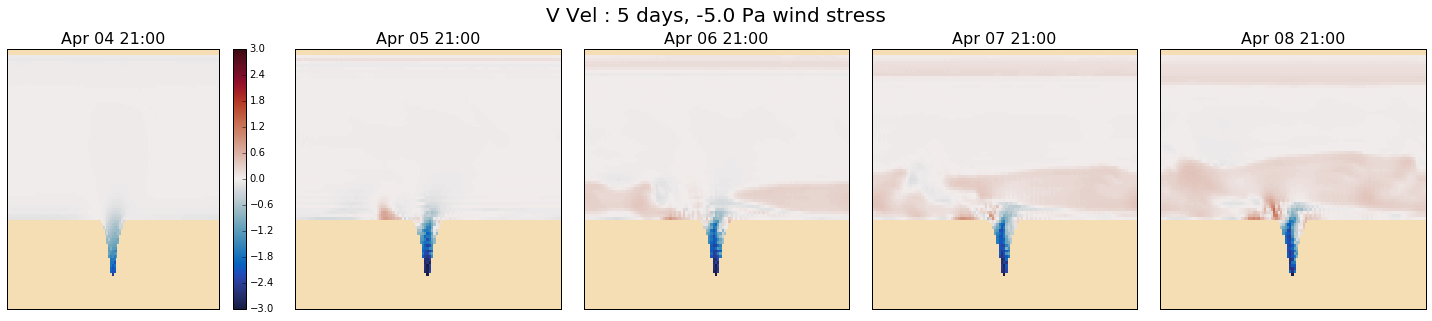

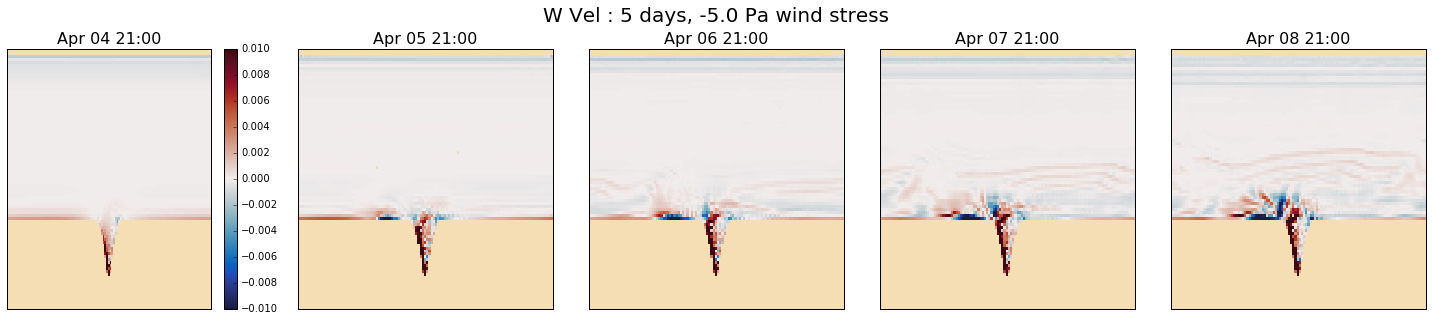

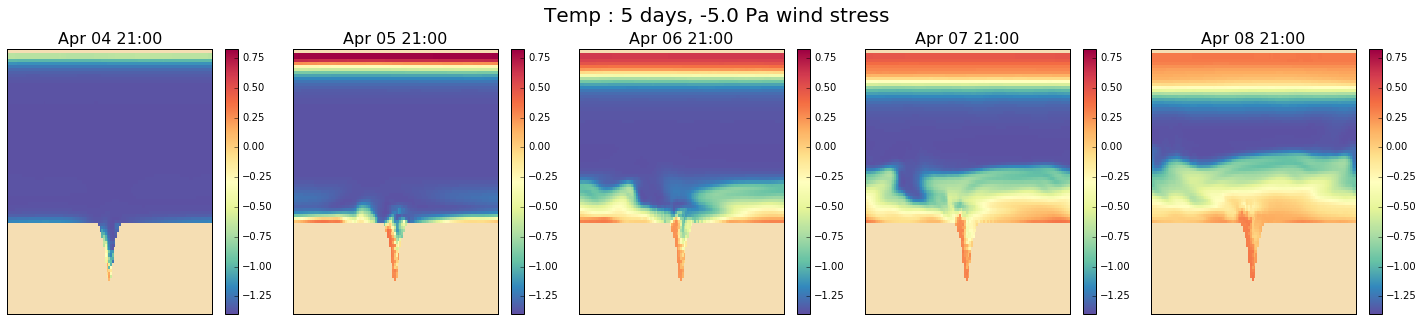

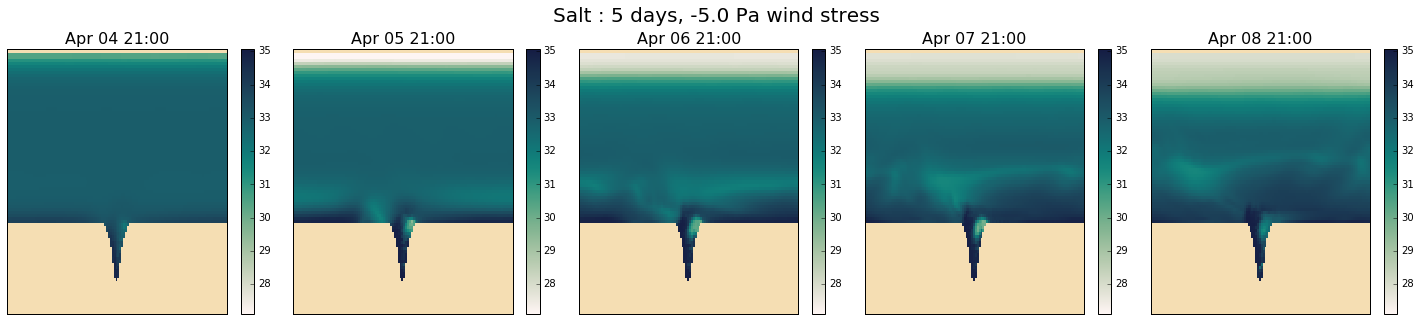

In [4]:
dep = 8; supttl = ' : 5 days, -5.0 Pa wind stress'
print(gridT_I15['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_I15, U_I15, dep, time_inds, 3.0, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_I15, V_I15, dep, time_inds, 3.0, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_I15, W_I15, dep, time_inds, 0.01, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_I15, tem_I15, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_I15, sal_I15, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run16 (Ideal) and Run17 (Real): Low Wind Stress (-0.1 Pa)

## A. Below shelf

111.224


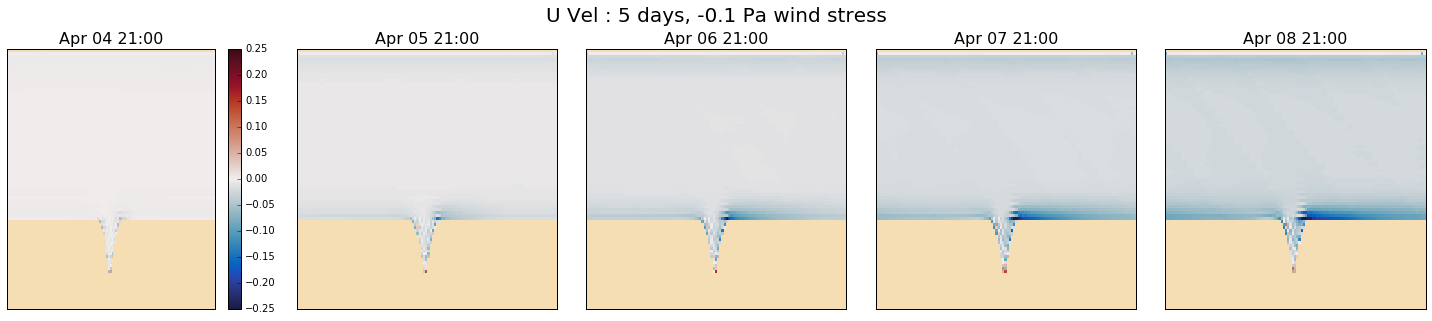

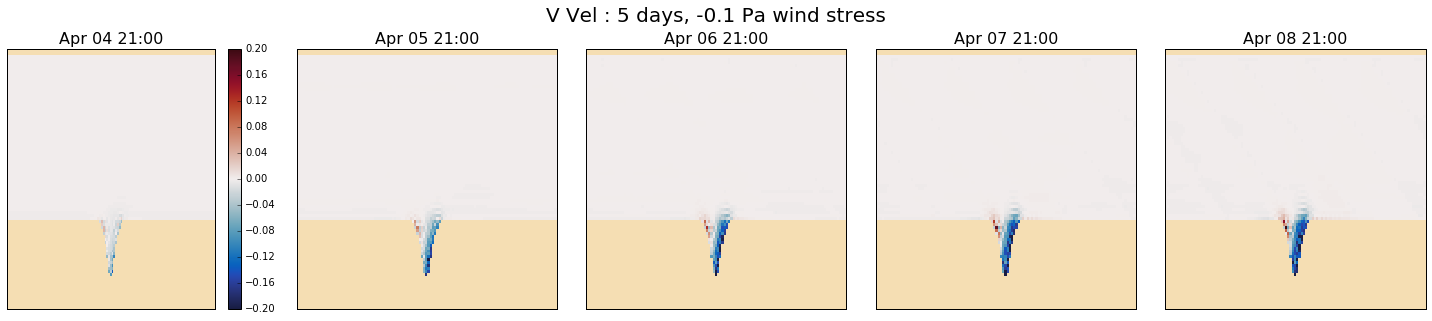

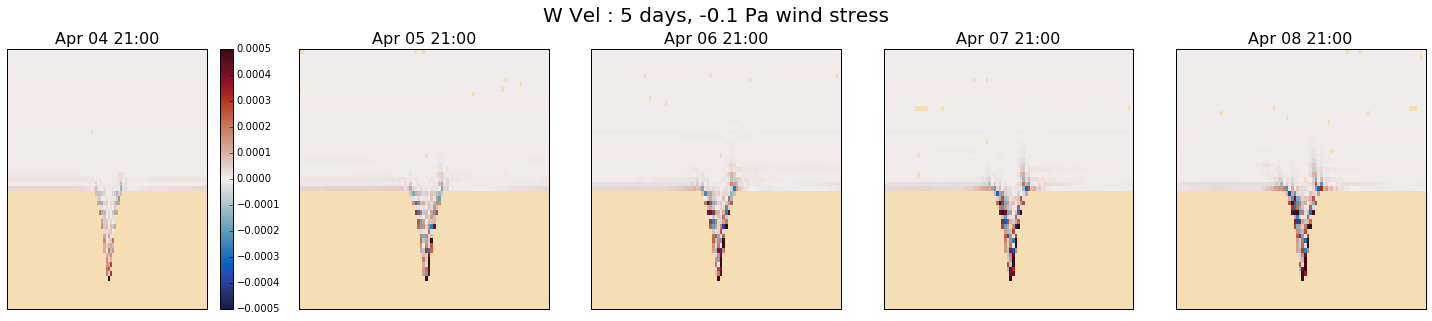

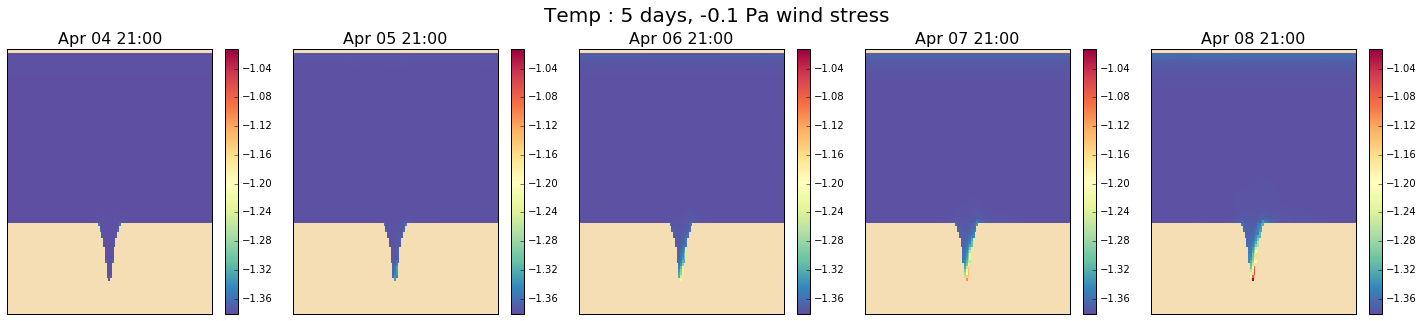

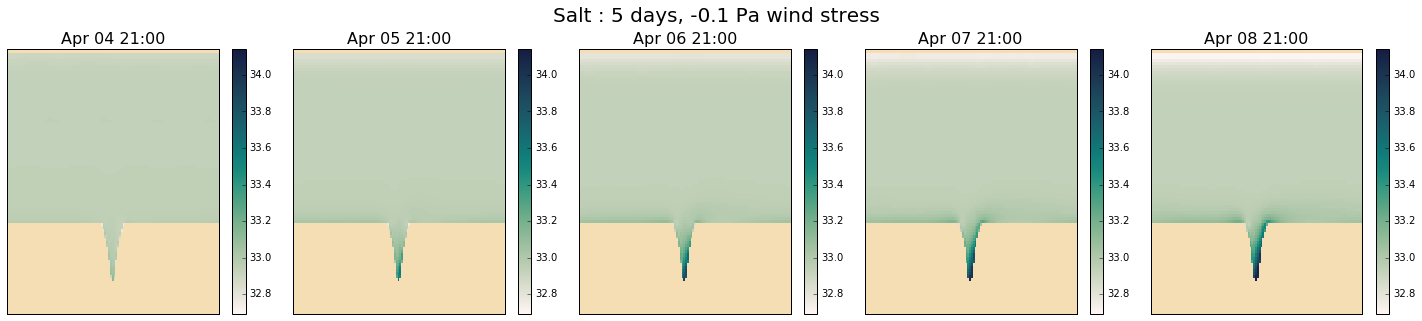

In [5]:
dep = 8; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_I16['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_I16, U_I16, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_I16, V_I16, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_I16, W_I16[:,:,5:60,10:105], dep, time_inds, 0.0005, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_I16, tem_I16, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_I16, sal_I16, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

111.224


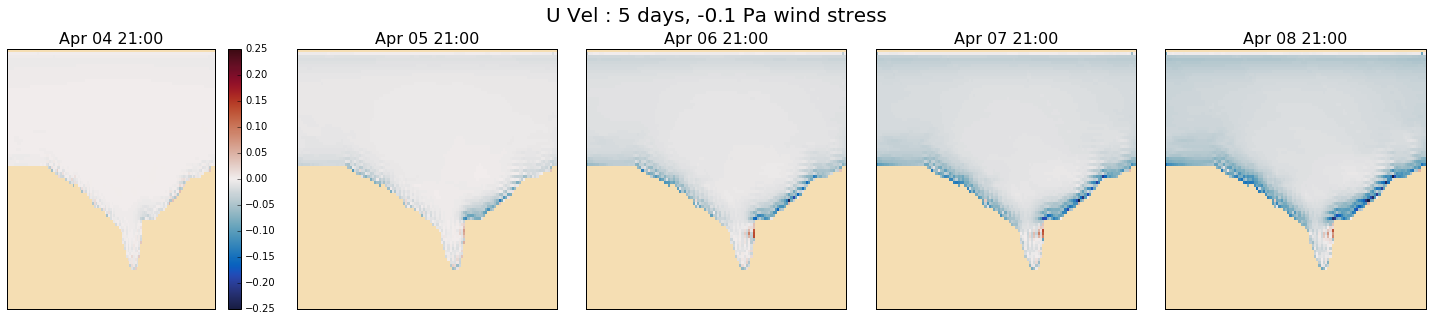

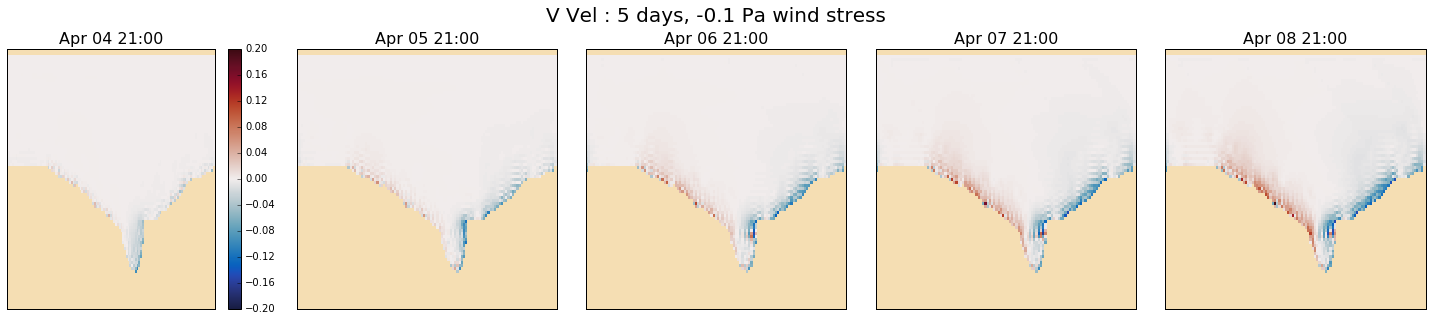

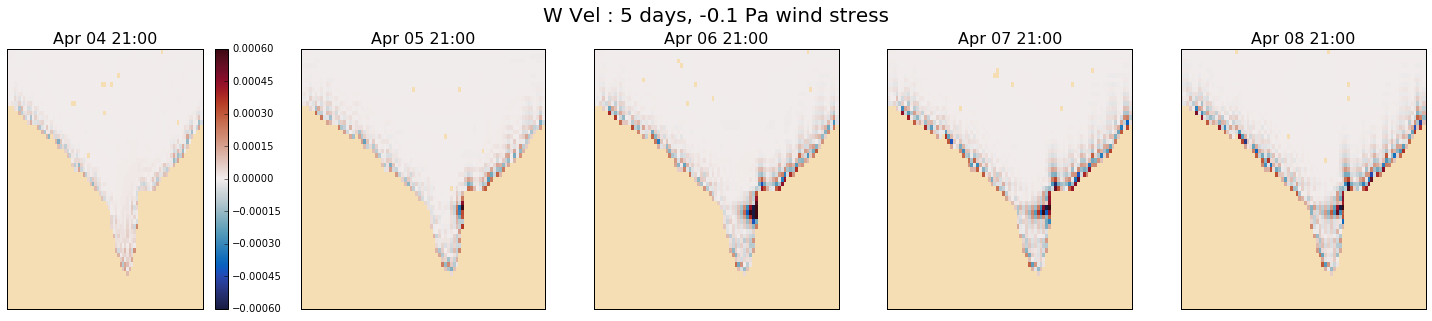

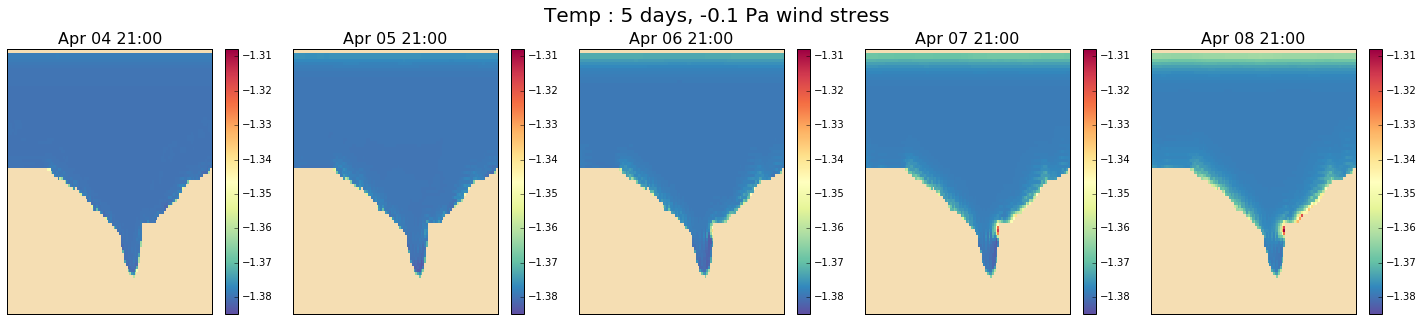

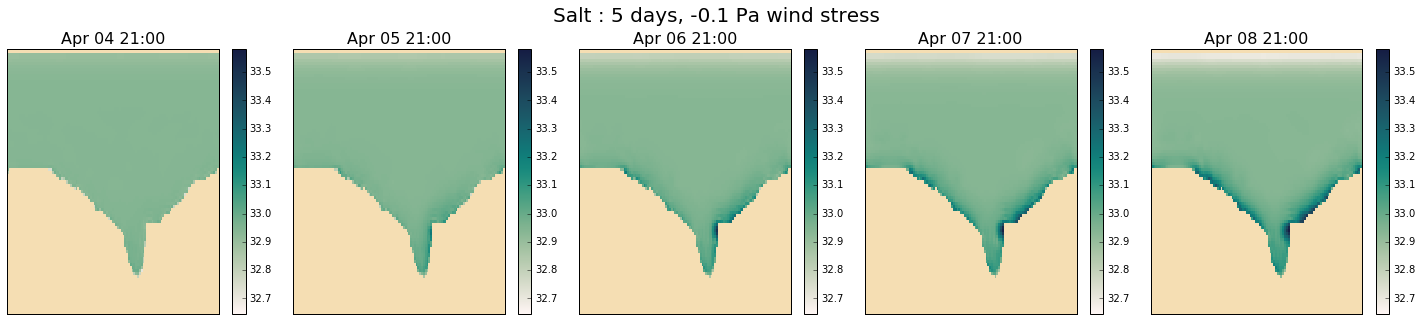

In [6]:
dep = 8; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_I17['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_I17, U_I17, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_I17, V_I17, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_I17, W_I17[:,:,5:60,20:105], dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_I17, tem_I17, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_I17, sal_I17, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

## At the surface

4.97527


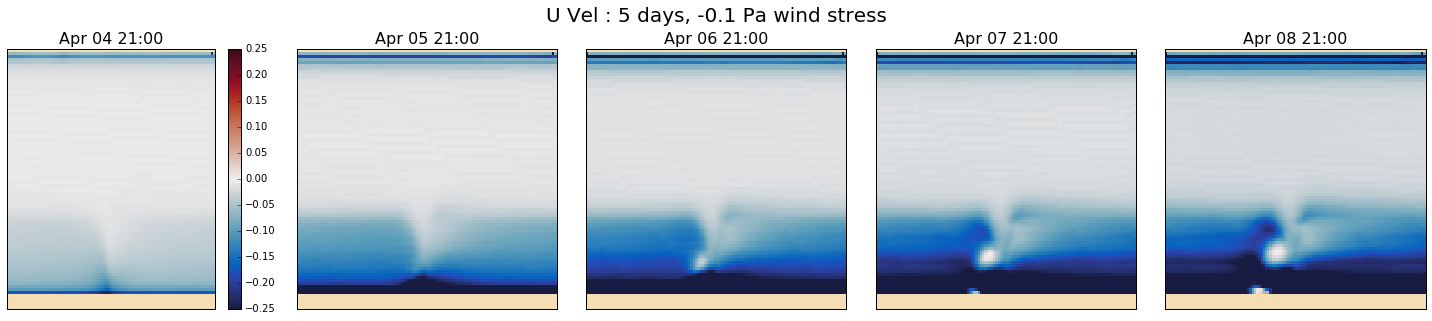

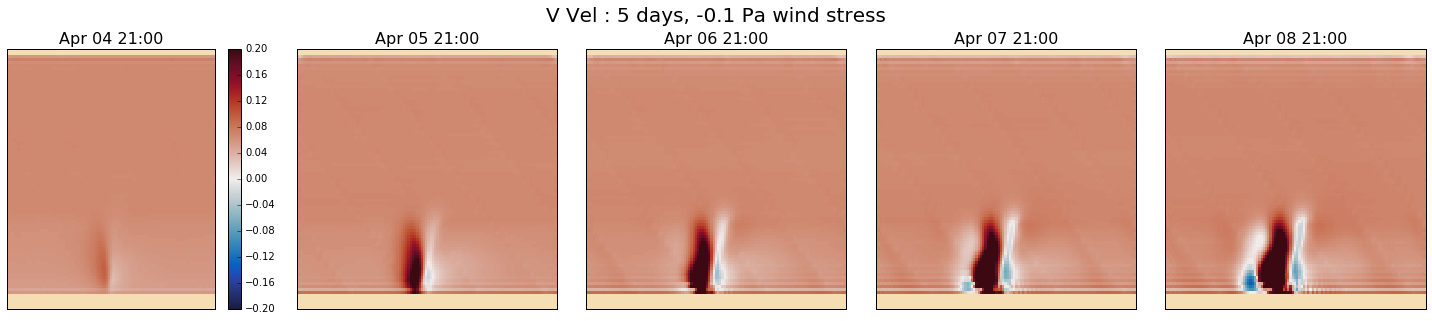

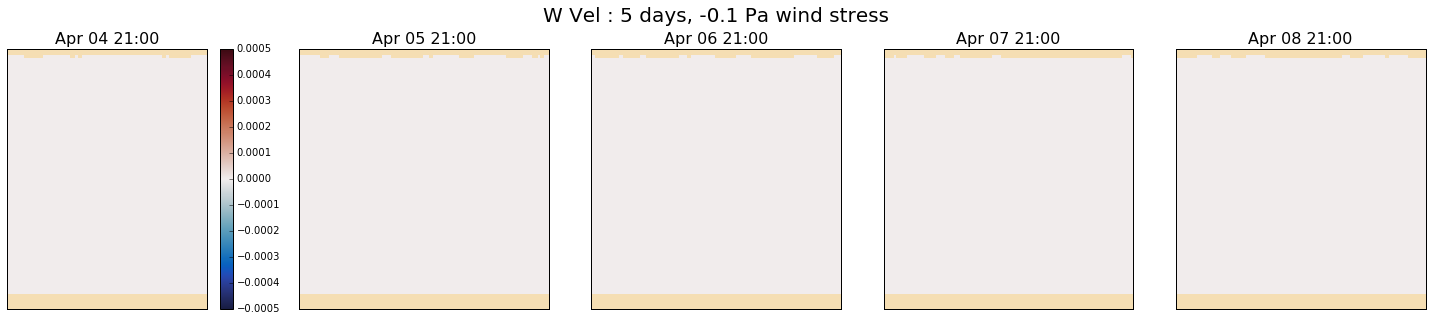

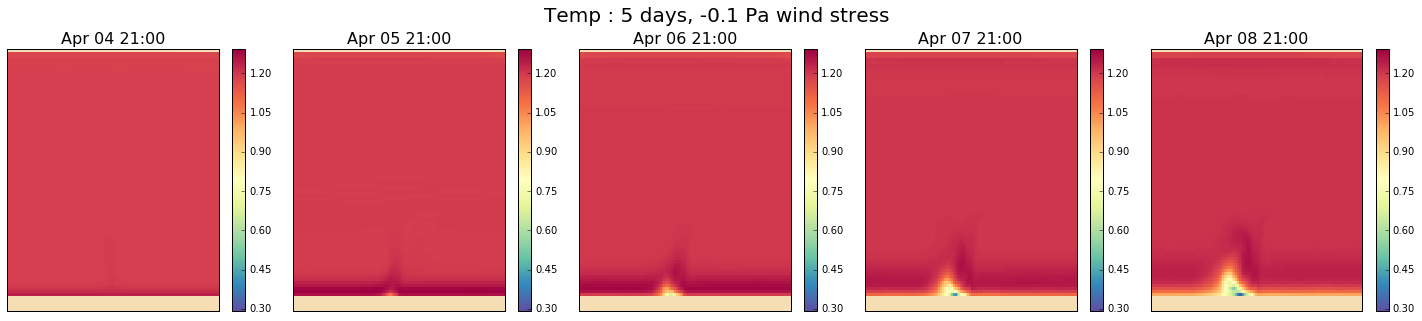

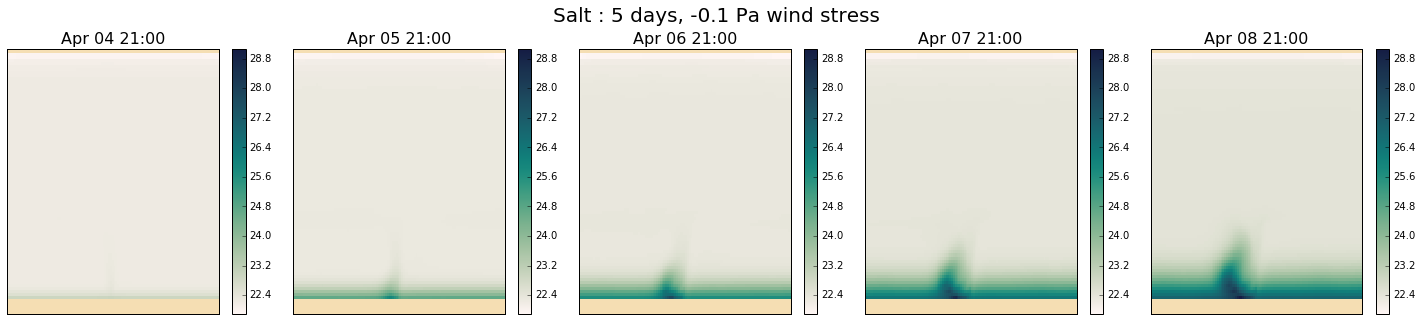

In [7]:
dep = 0; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_I16['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_I16, U_I16, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_I16, V_I16, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_I16, W_I16, dep, time_inds, 0.0005, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_I16, tem_I16, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_I16, sal_I16, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

4.97527


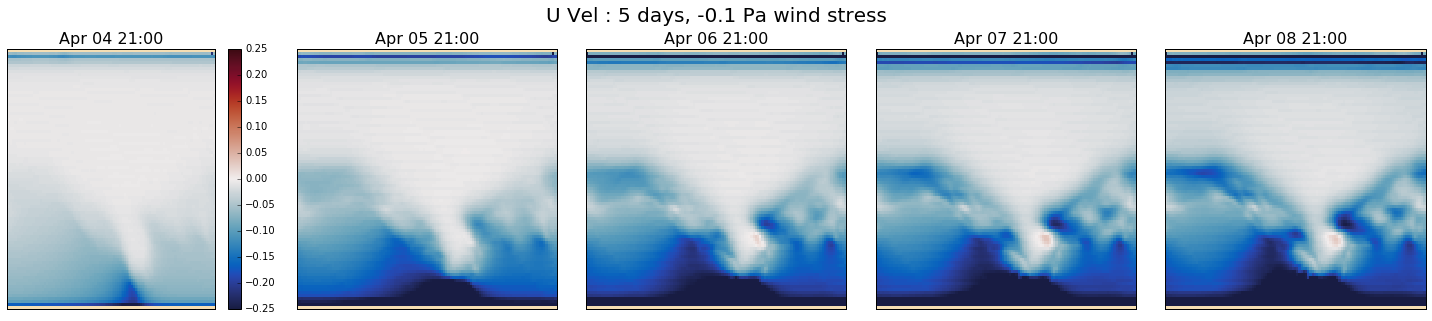

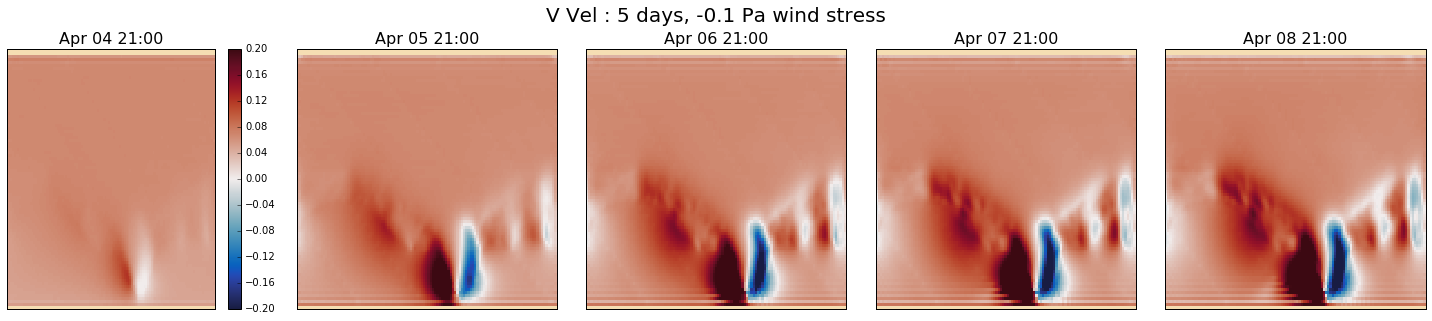

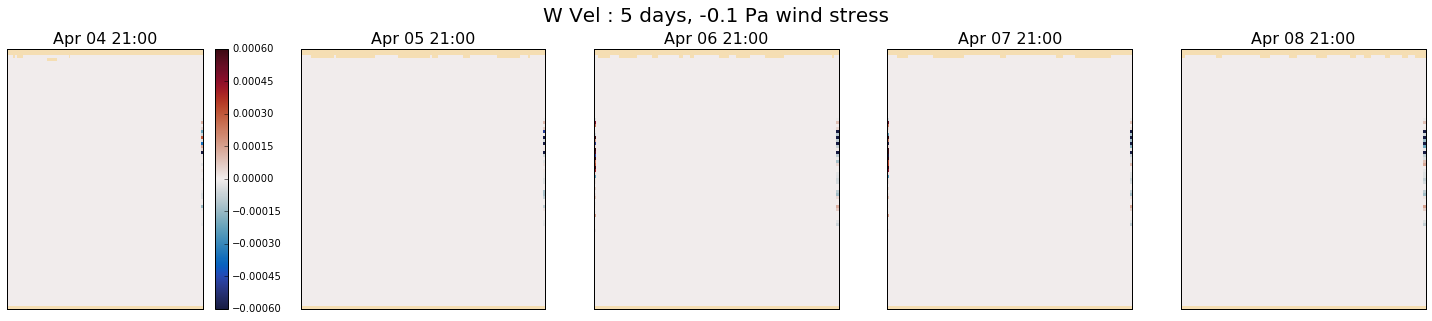

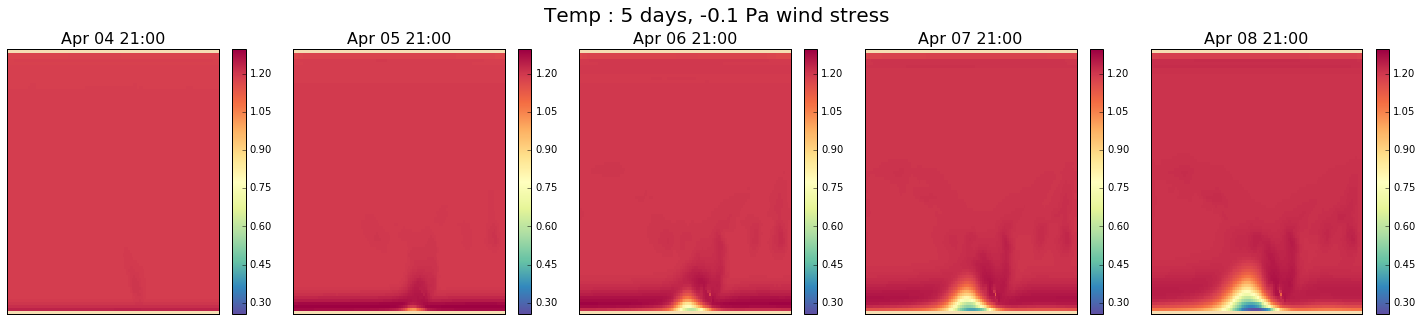

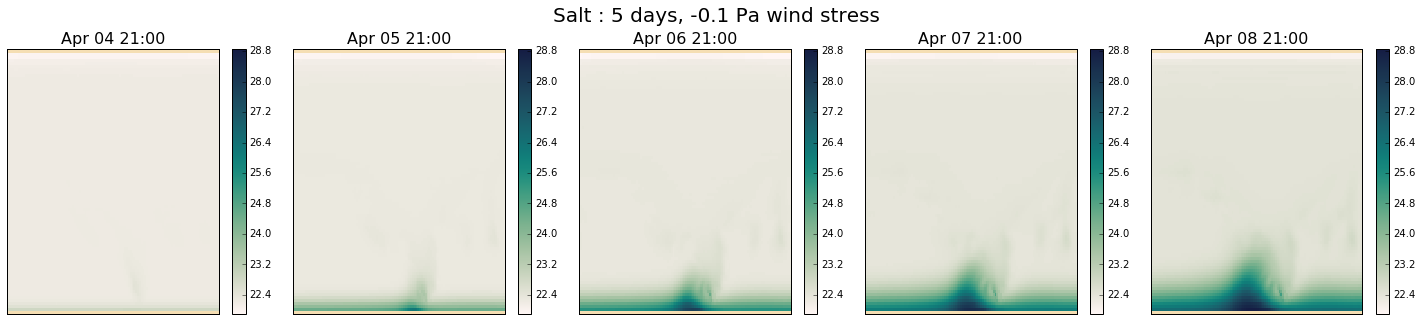

In [8]:
dep = 0; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_I17['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_I17, U_I17, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_I17, V_I17, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_I17, W_I17, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_I17, tem_I17, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_I17, sal_I17, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)